In [1]:
from sklearn import datasets
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20, resize =0.5, color=False)

In [6]:
n_samples,h,w = raw_face.images.shape #사진의 차원 구하기
print(n_samples) #일단 사진 3023개
print(h) # 데이터 세로 길이 62
print(w) # 데이터 가로 길이 47

X = raw_face.data #얼굴을 벡터로 표현
n,p = X.shape #차원수가 3023*2914
print(n)  #데이터 개수가 3023개니까 3023
print(p) #기존의 62*47 행렬을 일렬로 62*47=2914 -> 피처가 2914면 고차원임

y = raw_face.target 
target_names = raw_face.target_names
k = target_names.shape[0]
print(k) #얼굴종류 62

3023
62
47
3023
2914
62


In [8]:
from sklearn.model_selection import train_test_split
X_tn,X_te,y_tn,y_te = train_test_split(X,y,random_state=1)

In [9]:
from sklearn.decomposition import NMF
nmf = NMF (n_components = 10, random_state=0) #10차원으로 줄임
nmf.fit(X_tn)
X_tn_nmf = nmf.transform(X_tn)
X_te_nmf = nmf.transform(X_te)

/Users/kcm/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


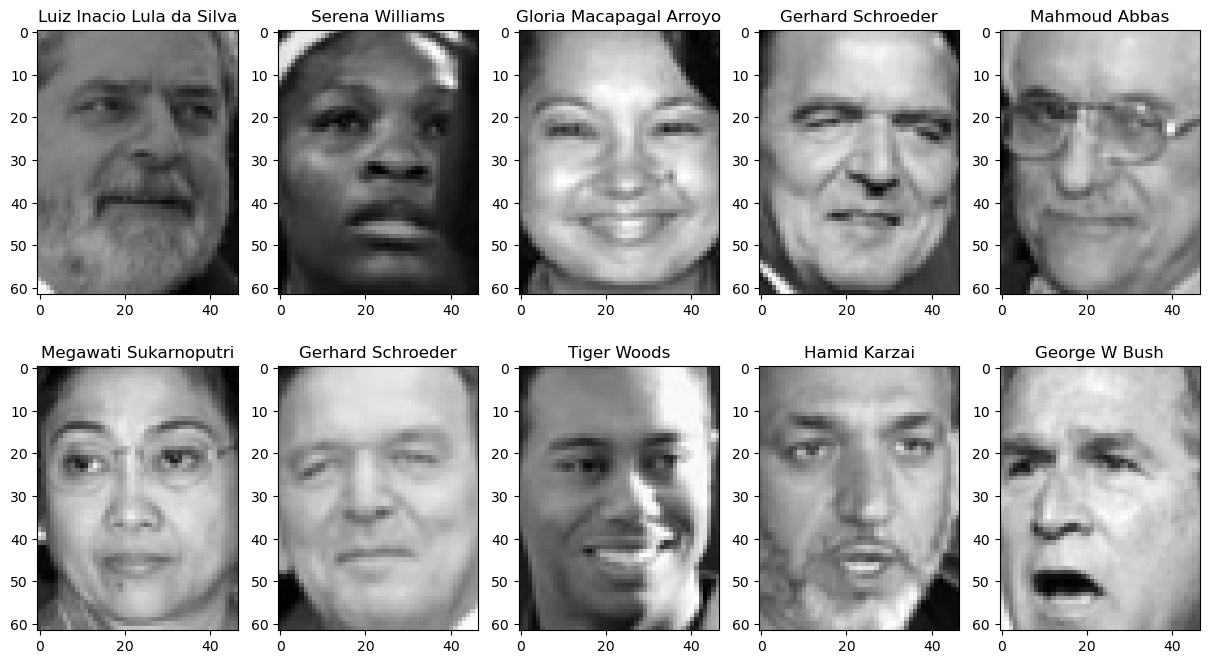

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.gray()
for i in range(2*5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_tn[i].reshape((h,w)))
    plt.title(target_names[y_tn[i]])
plt.show()

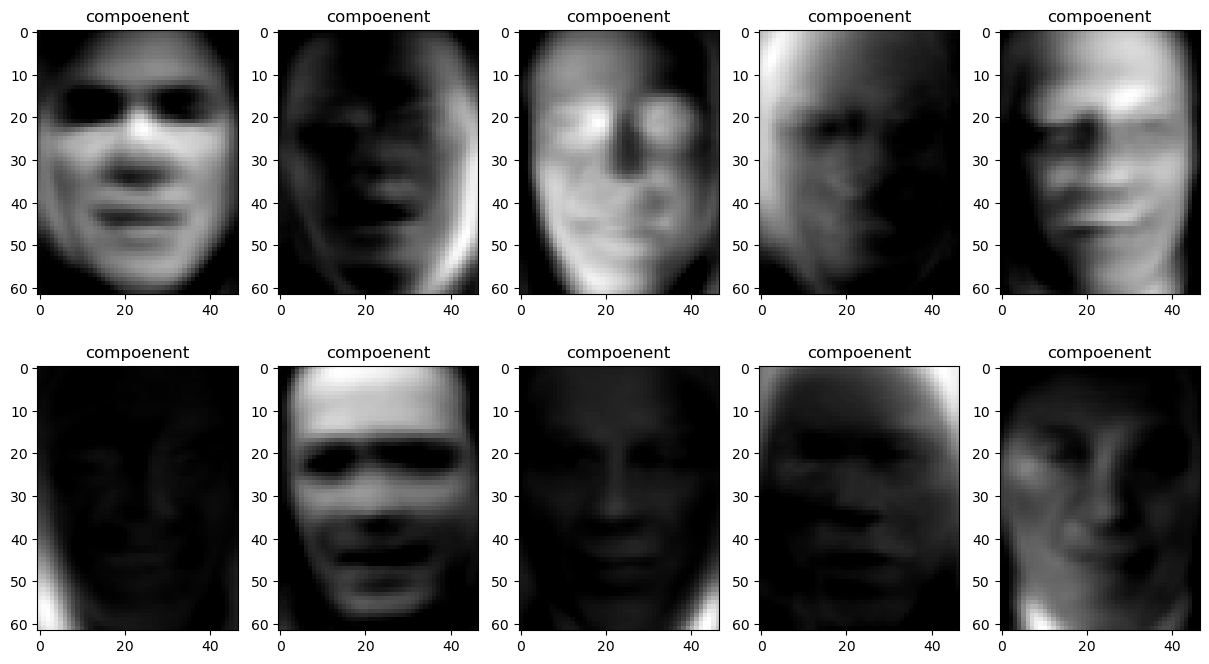

In [12]:
plt.figure(figsize=(15,8))
plt.gray() #흑백옵션
for i in range(2*5): #10차원이니까 10개 그림 그리기
    plt.subplot(2,5,i+1)
    plt.imshow(nmf.components_[i].reshape((h,w)))
    plt.title("compoenent".format(i))
plt.show()